# Les cycles d'un graphe

## Motivation : routage dans un réseau

https://en.wikipedia.org/wiki/Spanning_Tree_Protocol


**"broadcast"** : un noeud quelconque du réseau émet une information qui doit être **retransmise** à tous les noeuds du réseau

- N'est possible que si le graphe est connexe !

Proposition d'algorithme : 

- Chaque noeud qui reçoit l'information la retransmet à ses voisin sauf à celui duquel il l'a reçu

- **Problème** : Si il y a un cycle, l'information va tourner indéfiniment le long du cycle ("**broadcast storm**")

**Définition** : Un *cycle* d'un graphe $G = (V, E)$ est une liste $C = (c_0, \dots, c_{k-1})$ de sommets telle que
- les $c_i$ sont distincts (on interdit en particulier les allez-retours)
- pour tout $i$ entier, $(c_i, c_{i+1})$ est une arrête de $G$ où $i$ est compris modulo $k$ (c'est-à-dire que $(c_{k-1}, c_0)$ est aussi une arête)

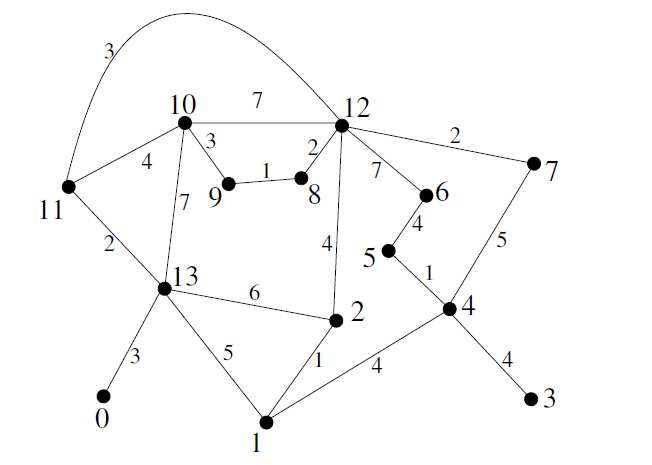

Exemple de cycles $(1, 2, 13)$ et $(4, 7, 12, 2, 1)$

## Problème de la recherche de cycles dans un graphe

Deux questions étant donné un graphe $G$:
- $G$ a-t-il un cycle ?  Méthode `is_acyclic(G)`

- touver un cycle de $G$: Méthode `find_cycle(G)`

Note: il n'est pas forcément nécessaire de trouver un cycle pour savoir qu'un graphe est acyclique.

### Nombre d'arcs dans un graphe et cycles

Soit $G = (V;E)$ un graphe. Alors:
- Si $G$ est connexe, alors $|E| \geq |V| - 1$.
- Si $G$ est sans cycle, alors $|E|\leq |V| - 1$.

- Si $G$ est connexe, alors $|E| \geq |V| - 1$ : il faut au moins une arête pour ateindre chaque noeud.
- Si $G$ est sans cycle, alors $|E| \leq |V| - 1$ : ajouter une arête crée un cycle. 

Un graphe $G=(V;E)$ est **sans cycle** si et seulement si $$|V| = k + |E|$$ où
$k$ est le nombre de composantes connexes.

- Algorithme `is_acyclic(G)` : on fait un parcours de graphe pour compter les composantes connexes


- Algorithme `find_cycle(G)` : on fait un parcours de graphe en partant d'un noeud et en notant pour chaque noeuds traversés comment on l'a atteint. Si l'on atteint deux fois un noeuds, on a trouvé un cycle.

## Notion d'arbre

**Définition** : Un *arbre* est un graphe **connexe** et **sans cycle** (on dit aussi **acyclique**)

Dans un arbre, on a pas de problème pour le routage:

**Proposition** : $G$ est un arbre si et seulement si, pour tout couple de sommets $s$ et $t$, il existe un **unique chemin simple** (qui ne repasse jamais deux fois par le même sommet) de $s$ à $t$.

**Proposition (Caractérisations d'un Arbre)** :
Pour un graphe $T$ à $n$ sommets, il y a équivalence entre les propriétés :

1. $T$ est un arbre
2. $T$ est un graphe connexe à $n-1$ arêtes
3. $T$ est connexe, et la suppression de toute arête le déconnecte
4. $T$ est acyclique à $n-1$ arêtes

Note: $T$ est acyclique et l'ajout de toute arête le rend cyclique.


## Notion d'arbre couvrant

**Définition** Étant donné un graphe $G=(V;E)$, on appelle **arbre couvrant** de $G$ un graphe $T=(V;F)$ tel que
- $T$ est un arbre
- $T$ est un graphe partiel de $G$ (Même sommets et $F\subset E$).

Intuitivement: $T$ est construit avec les arêtes $U$ de $G$ en connectant ("couvre") tous les sommets de $V$. 


<img src="../media/4x4_grid_spanning_tree.svg" width="400" height="400" />

<img src="../media/Minimum_spanning_tree.svg" width="600" height="600" />

**Proposition** Un graphe $G=(V;E)$ admet un *arbre couvrant* si et seulement si il est *connexe*

Le problème de l'**arbre couvrant de poids minimum** consiste à trouver un arbre couvrant
dont la somme des poids $c(e)$ des arêtes est minimum.


#### Ne pas confondre:
- arbre couvrant de poids minimum (MST, Minimum Spanning Tree) : minimise la somme
des poids des arêtes
 
- arbre des plus courts chemins (SPT, Shortest Paths Tree) construit par exemple
par BFS (Breadth First Search) ou Dijsktra : minimise la distance de la racine à chaque sommet


<div style="text-align: center">
<img style="float : left; height : 300px" src="../media/tree-022.jpg"><img style="float: left; height : 300px" src="../media/tree-023.jpg">
</div>

**Idée** : On part du graphe $T=(V, \emptyset)$ et on ajoute tour à tour la nouvelle arête de plus petit poids qui ne crée pas de cycles (i.e. qui connecte deux composantes connexes différentes).

**Invariant** : À l'étape $i$, le graphe $T$ est acyclique avec $i$ arêtes de poids minimal

- [Algorithme de Kruskal](https://fr.wikipedia.org/wiki/Algorithme_de_Kruskal)
- [Union Find](https://fr.wikipedia.org/wiki/Union-find)

**Idée** : On choisi un noeuds $n$ part du graphe $T=(\{n\}, \emptyset)$ et on ajoute tour à tour un nouveau noeud en le connectant autre en choisissant l'arête de poids minimum parmis.

**Invariant** : Le graphe $T=(U,F)$ est toujours l'arbre convrant de poids minimal sur $U\subset V$.

- [Algoritme de Prim](https://fr.wikipedia.org/wiki/Algorithme_de_Prim)
- [File de priorité](https://fr.wikipedia.org/wiki/File_de_priorit%C3%A9)